# Mein Projekt

Erkenntnisse
-----
- Abstand zwischen zwei Punkten im Raster ~48 (da dst(ox, origin) & dst(oy, origin) ~144)
- Abstand zwischen zwei Punkten im Raster, diagonal = sqrt(48^2 + 48^2) ~ 68, mit Messwerten verifizierbar
- Abweichung von theoretischer zu echter Distanz o,x bzw. o,y ~10%

ToDo
----
- test for different touchcodes

In [11]:
import itertools
import numpy as np
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy.spatial import distance

samples = {}
samples[0b10000000] = [[(1643,614),(1450,649),(1555,663),(1568,731)],
           [(577,629),(379,577),(471,631),(453,701)],
           [(1486,68),(1638,213), (1581,119),(1628,69)],
           [(1676,651),(1530,799),(1619,750),(1675,791)],
           [(176,469), (320,324),(225,373),(175,324)],            
           [(725,544),(860,697),(819,599),(869,557)],
           [(346,509),(494,368),(399,415),(346,367)],
           [(769,593),(750,792),(793,695),(865,701)],
            [(269,202),(477,205),(375,164),(382,93)],
            [(303,152), (379,577),(368,171),(368,285)]]


orientation vectors: [320 324], [176 469]
[array([175, 324]), array([320, 324]), array([175, 324]), array([176, 469]), array([120, 120]), array([230, 230])]


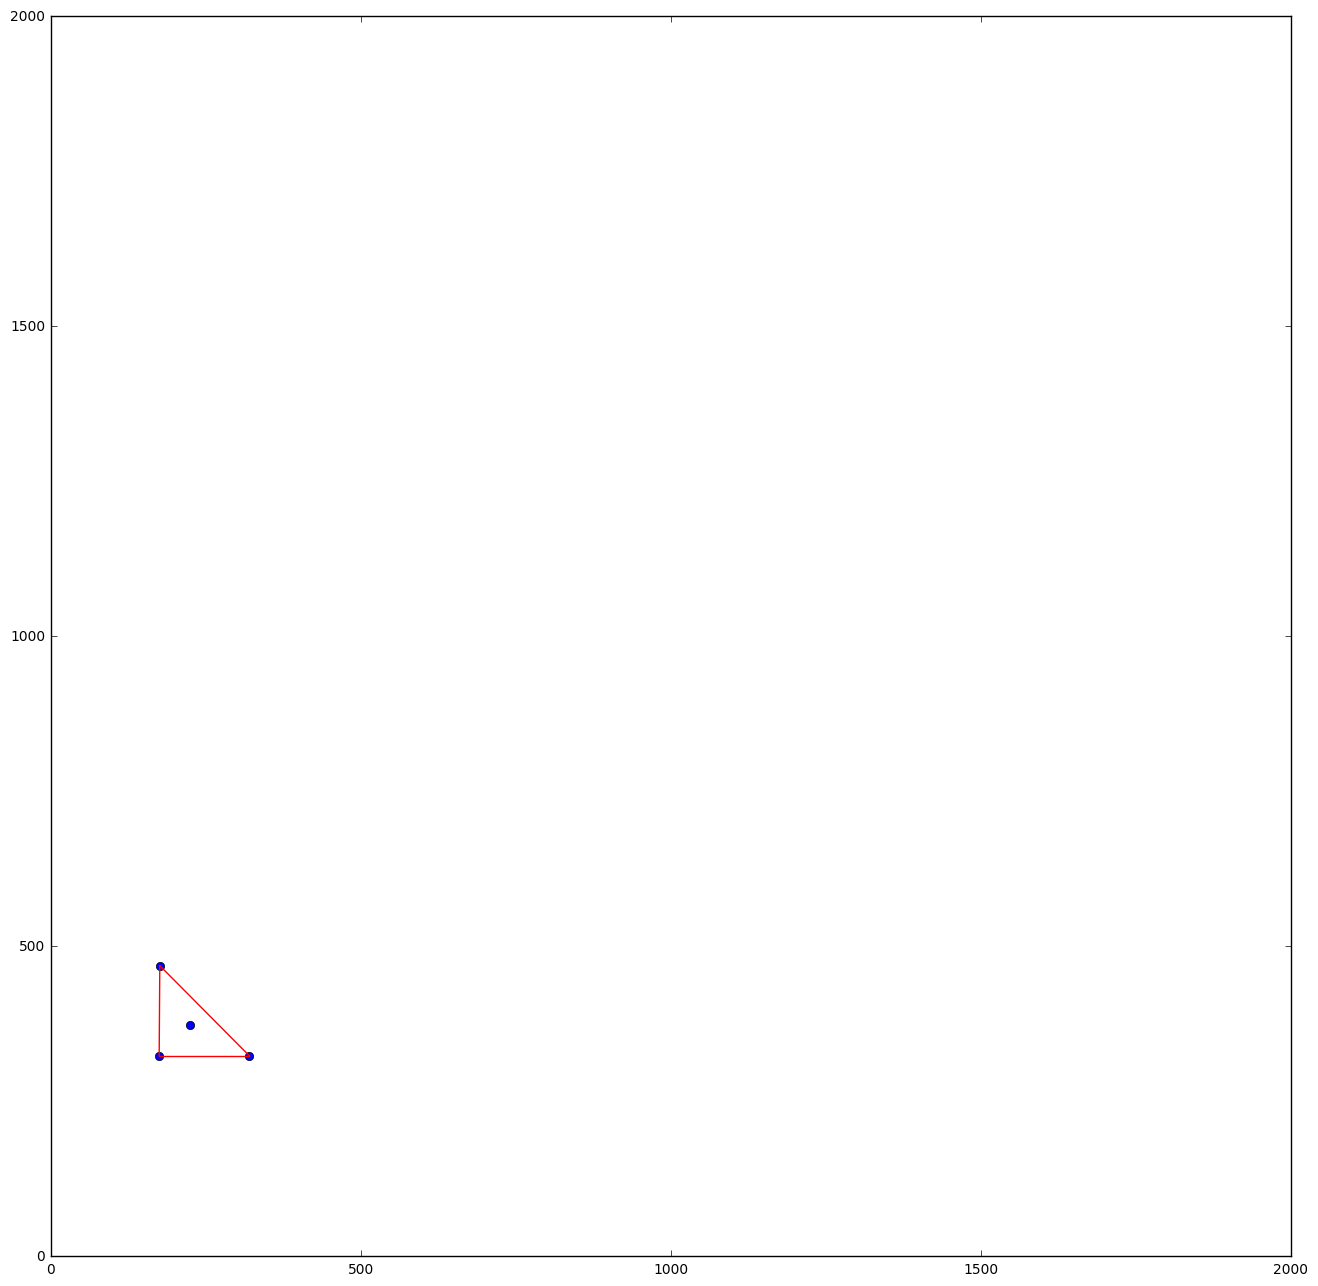

s.x: 1.0344827586206897, s.y: 1.020878911823457
next step. dst(x,y) = 204.35508312738395 => dst(o,x|y) ~= 144.5008650493138 [is 145.0 and 145.00344823486094]


In [1]:
def sample_to_ndarray(sample):
    points = []
    
    for point in sample:
        points.append(point[0])
        points.append(point[1])
    
    return np.array(points)


def render_sample(index):
    df = pd.DataFrame(samples[index], columns=['x', 'y'])
    print(df)
    fig = df.plot.scatter(x='x', y='y', color='red', figsize=(15,15))

    fig.set_xlim([0, 2000])
    fig.set_ylim([0, 2000])

    plt.gca().set_aspect('equal', adjustable='box')
    plt.ylabel('some numbers')

    plt.show()

def convex_hull(sample):
    # convert points of sample to ndarray
    points = np.asarray(sample)
    
    # find the convex hull
    hull = ConvexHull(points)    
   
    plt.figure(num=None, figsize=(18, 16), dpi=320, facecolor='w', edgecolor='r')
    
    plt.xlim([0,2000]) 
    plt.ylim([0,2000]) 

    # plot the original points
    plt.plot(points[:, 0], points[:, 1], 'o')

    # plot the convex hull around it
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'r')

    # adjustment to coordinate system
    plt.gca().set_aspect('equal', adjustable='box')
    
    # display that crap
    plt.show()


def get_distances_for_sample(sample):
    oy = sample[0]
    ox = sample[1]
    tc = sample[2] # part of the code
    origin = sample[3] # origin

    return[distance.euclidean(origin, ox), distance.euclidean(origin, oy),distance.euclidean(ox, oy),distance.euclidean(tc, origin) ]
    

def get_statistics_for_sampleset(sampleset):
    dst_origin_ox = []
    dst_origin_oy = []
    dst_ox_oy = []
    dst_origin_tc = []

    for i in range(0,9): 
        sample = samples[0b10000000][i]
        distances = get_distances_for_sample(sample)
        
        dst_origin_ox.append(distances[0])
        dst_origin_oy.append(distances[1])
        dst_ox_oy.append(distances[2])
        dst_origin_tc.append(distances[3])

    print("dst(origin,x): mean({0}), max({1}, min({2}))".format(np.mean(dst_origin_ox), np.max(dst_origin_ox), np.min(dst_origin_ox)))
    print("dst(origin,y): mean({0}), max({1}, min({2}))".format(np.mean(dst_origin_oy), np.max(dst_origin_oy), np.min(dst_origin_oy)))
    print("dst(ox,oy): mean({0}), max({1}, min({2}))".format(np.mean(dst_ox_oy), np.max(dst_ox_oy), np.min(dst_ox_oy)))
    print("dst(origin,tc): mean({0}), max({1}, min({2}))".format(np.mean(dst_origin_tc), np.max(dst_origin_tc), np.min(dst_origin_tc)))

    
sample = samples[0x80][4]
#get_statistics_for_sampleset(samples[0b10000000])
get_orientation_marks(sample)
convex_hull(sample)
#get_statistics_for_sampleset(samples[0x80])



def norm(sample):
    o = np.array(sample[3])
    x = np.array(sample[1])
    y = np.array(sample[0])
    s = np.array(sample[2])
    
    # Richtungsvektoren entlang der Kanten vom Referenzsystem
    vx = x - o
    vy = y - o
    # Ortsvektor des Punkts bzgl o (wo ist s bgzl des neuen Ursprungs o)
    so = s-o
    
    # Normierung der Richtungsvektoren    
    vx = (vx/(np.linalg.norm(vx)))/(np.linalg.norm(vx))*3
    vy = (vy/(np.linalg.norm(vy)))/(np.linalg.norm(vy))*3
   
    xcor = np.dot(vx,so)
    ycor = np.dot(vy,so)
    
    
    dst_x_y = distance.euclidean(x,y)
    dst_o_xy = dst_x_y / np.sqrt(2)
    dst_o_x = distance.euclidean(o,x)
    dst_o_y = distance.euclidean(o,y)
    
    
    print("s.x: {0}, s.y: {1}".format(xcor, ycor))
    print("next step. dst(x,y) = {0} => dst(o,x|y) ~= {1} [is {2} and {3}]".format(dst_x_y, dst_o_xy, dst_o_x, dst_o_y))

norm(sample)


In [15]:
for i in range(0, len(samples[0x80]) - 1):
    sample = samples[0x80][i]
    points = np.asarray(sample)
    hull = ConvexHull(points)
    print("vertices: {0}".format(hull.vertices))
    #print("neighbors: {0}".format(hull.neighbors))
    #print("points: {0}".format(hull.points))
    #print("simplices: {0}".format(hull.simplices))

vertices: [1 0 3]
vertices: [1 0 3]
vertices: [1 0 3]
vertices: [1 0 3]
vertices: [3 1 0]
vertices: [0 3 1]
vertices: [1 0 3]
vertices: [3 1 0]
vertices: [1 0 3]


In [12]:
"""API Cell"""

import collections
import pandas as pd

def are_same(reference, value, percentage):
    min_value = reference - reference * percentage
    max_value = reference + reference * percentage
    result = min_value < value < max_value
    #print("reference: {0}, min: {1}, max: {2}, value: {3}, matches: {4}".format(reference, min_value, max_value, value, result))
    return result


def get_orientation_marks(points):
    p_threshold = 10
    hull = ConvexHull(points)  
    
    vectors = []
    
    for combination in list(itertools.combinations(hull.vertices, 2)):
        p1 = points[combination[0]]
        p2 = points[combination[1]]
        dst = distance.euclidean(p1, p2)
        
        vectors.append((p1, p2, dst))      
        
        # wolf tipp: distanz (x,y) = längste distanz = lmax
        # distanz (o,x) || (o,y) = sqrt(lmax)
    
    # get tuple with longest
    orientation = max(vectors, key=itemgetter(2))
    
    print("v1: {0}, v2: {1}, dst(v1, v2): {2}]".format(orientation[0], orientation[1], orientation[2]))
    
    v1 = orientation[0]
    v2 = orientation[1]
    
    vectors = [a for a in vectors if not orientation[2] == a[2]]
    
    origin = None
    
    candidates = []
    
    for vector in vectors:
        if are_same(orientation[2] / np.sqrt(2), vector[2], 0.05):
            if np.array_equal(vector[0], v1) or np.array_equal(vector[0], v2):
                candidates.append((vector[1][0], vector[1][1]))
            if np.array_equal(vector[1], v1) or np.array_equal(vector[1], v2):
                candidates.append((vector[0][0], vector[0][1]))
    
    origin = np.array([k for k, v in collections.Counter(candidates).items() if v == 2])
    
    print(origin)
    print("Candidates for origin: {0}".format(candidates))
    print("origin: {0}".format(origin))
    
    return (None, None, None)

In [46]:
"""Test Cell"""
import sys
import traceback
from termcolor import colored
import numpy as np
import io
from contextlib import redirect_stdout


for l in locals().copy():
    if l[0:6] == "__test":
        del locals()[l]
        
loc = locals()

def run_all_tests():
    tests = [test for test in loc if test[0:7] == "__test_"]
    print(">>>> UXID Test Runner <<<<")
    print("==========================")
    print("Loaded {0} Tests\n".format(len(tests)))
    
    errors = []
    
    for test in tests:
        test_output = ""
        test_runner_output = ""
        
        with io.StringIO() as buf, redirect_stdout(buf):    
            try:
                globals()[test]()
                test_runner_output += colored('[Success] {}'.format(test), 'green')
            except AssertionError as e:
                _, _, tb = sys.exc_info()
                tb_info = traceback.extract_tb(tb)
                filename, line, func, text = tb_info[-1]
                errors.append((filename, line, func, text))
                test_runner_output += colored('[Failure] {0} (Line {1}: {2})'.format(func, line, text), 'red')
            test_output = buf.getvalue()
        print(test_runner_output)
        if(test_output):
            print(test_output.strip())
        
    print("\n{0} success, {1} failures in {2} tests".format(len(tests) - len(errors), len(errors), len(tests)))


def __test_get_orientation_vectors_simple():
    coords = np.array([ [0, 0], [3, 0], [0, 3], [1, 1] ])
    om = get_orientation_marks(coords)
    assert om[0] == coords[0]
    assert om[1] == coords[2]
    assert om[2] == coords[1]

def __test_get_orientation_vectors_with_noise():
    coords = np.array([ [0, 0], [3, 0], [0, 3], [1, 1], [2, 1], [1, 2] ])
    assert False # implement
    
    
def __test_x():
    x = 3 + 4
    print("hey!")
    assert x == 7
    
run_all_tests()


>>>> UXID Test Runner <<<<
Loaded 3 Tests

[Failure] __test_get_orientation_vectors_simple (Line 49: assert om[0] == coords[0])
v1: [3 0], v2: [0 3], dst(v1, v2): 4.242640687119285]
[[0 0]]
Candidates for origin: [(0, 0), (0, 0)]
origin: [[0 0]]
[Failure] __test_get_orientation_vectors_with_noise (Line 55: assert False # implement)
[Success] __test_x
hey!

1 success, 2 failures in 3 tests


c:\program files\python35\lib\site-packages\ipykernel\__main__.py:49: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
